# Analysing clusters detected by mmseq2

Contigs that have at least 50% sequence identity were clustered using MMSeq2. This notebook further analyzed the results to find trends related to size of clusters, lengths of sequences in cluster, taxonomy, etc.

In [2]:
# importing pandas and seaborn for plotting
import pandas as pd
import seaborn as sns

In [48]:
# read in the output cluster table produced by mmseq2 cluster. Also removed commas from the sequence name
cl_table = pd.read_csv("tests/data/testset1_refseq_nospace_linclustDB_nocomma.tsv",
                      sep="\t", header=None)


In [49]:
cl_table.head()

,0,1
0,known_unknowns_Contig_18077_354.963:1.13115,known_unknowns_Contig_18077_354.963:1.13115
1,known_unknowns_Contig_82462_11.3453:1.1051,known_unknowns_Contig_82462_11.3453:1.1051
2,known_unknowns_Contig_4560_17.44:1.5733,known_unknowns_Contig_4560_17.44:1.5733
3,known_unknowns_Contig_4560_17.44:1.5733,_SRR1765181_Contig_4460_10.6825:1.6124
4,known_unknowns_Contig_3981_58.0174:1.1403,known_unknowns_Contig_3981_58.0174:1.1403


In [50]:
# group by the reference cluster name and then converting its members to a list
gp_table = cl_table.groupby(0)[1].apply(list)
all_cl_table = pd.DataFrame(gp_table)
all_cl_table.head()

,1
0,
AC_000001.1_Ovine_adenovirus_A__complete_genome,[AC_000001.1_Ovine_adenovirus_A__complete_geno...
AC_000003.1_Canine_adenovirus_1__complete_genome,[AC_000003.1_Canine_adenovirus_1__complete_gen...
AC_000004.1_Duck_adenovirus_A__complete_genome,[AC_000004.1_Duck_adenovirus_A__complete_genom...
AC_000006.1_Human_adenovirus_D__complete_genome,[AC_000006.1_Human_adenovirus_D__complete_genome]
AC_000007.1_Human_adenovirus_2__complete_genome,[AC_000007.1_Human_adenovirus_2__complete_geno...


In [51]:
# from list to rows
all_cl_df = pd.DataFrame(all_cl_table[1].apply(pd.Series).stack())
all_cl_df.columns = ["members"]
all_cl_df.tail()

members
0                                                                                
known_unknowns_Contig_9_52.291:1.6995  18   _SRR1197057_Contig_148_178.296:1.5641
                                       19   _SRR1196623_Contig_148_173.026:1.5641
                                       20   _SRR1197729_Contig_147_162.632:1.5641
                                       21    _SRR1197689_Contig_146_173.27:1.5641
known_unknowns_Contig_9_7.68311:1.1986 0   known_unknowns_Contig_9_7.68311:1.1986

In [52]:
# Distribution of cluster size
cl_size = pd.DataFrame(all_cl_df.groupby(0).apply(len))
cl_size.columns = ["size"]
cl_size.head()


,size
0,
AC_000001.1_Ovine_adenovirus_A__complete_genome,2
AC_000003.1_Canine_adenovirus_1__complete_genome,2
AC_000004.1_Duck_adenovirus_A__complete_genome,2
AC_000006.1_Human_adenovirus_D__complete_genome,1
AC_000007.1_Human_adenovirus_2__complete_genome,2


In [53]:
# clusters larger than 3 only
cl_no3ing = cl_size[cl_size['size'] > 3]
cl_no3ing.head()
#len(cl_nosing)
#sns.distplot(cl_nosing['size'].tolist())

,size
0,
NC_001367.1_Tobacco_mosaic_virus__complete_genome,5
NC_001501.1_Moloney_murine_leukemia_virus__complete_genome,5
NC_001554.1_Tomato_bushy_stunt_virus__complete_genome,10
NC_002792.2_Ribgrass_mosaic_virus__complete_genome,4
NC_003449.1_Striped_Jack_nervous_necrosis_virus__complete_genome,5


In [55]:
# read in fai file generated using samtools to get sequence length of each sequence
len_table = pd.read_csv("tests/data/testset1_refseq_nospace_nocomma.fasta.fai",
                        sep="\t", header=None, index_col=0, names=["length", "A", "B", "C"])
len_table = len_table.drop(columns=["A", "B", "C"])
len_table.head()

,length
known_unknowns_Contig_1456_15.8992:1.1171,1171
known_unknowns_Contig_3410_16.1664:1.1252,1252
known_unknowns_Contig_202_5.64787:1.1102,1102
known_unknowns_Contig_13078_7.69086:1.1990,1990
known_unknowns_Contig_47579_6.28328:1.2724,2724


In [56]:
# convert length to dictionary
len_dict=len_table.to_dict()

In [57]:
# replace name with length of contigs in each cluster
length_info = all_cl_df.replace(len_dict['length'])
length_info.head()

members
0                                                         
AC_000001.1_Ovine_adenovirus_A__complete_genome  0   33034
                                                 1   33034
AC_000003.1_Canine_adenovirus_1__complete_genome 0   30536
                                                 1   30536
AC_000004.1_Duck_adenovirus_A__complete_genome   0   33213

In [58]:
length_info_reset = length_info.reset_index()
length_info_final = length_info_reset.drop(["level_1"], axis=1)
length_info_final.head()



,0,members
0,AC_000001.1_Ovine_adenovirus_A__complete_genome,33034
1,AC_000001.1_Ovine_adenovirus_A__complete_genome,33034
2,AC_000003.1_Canine_adenovirus_1__complete_genome,30536
3,AC_000003.1_Canine_adenovirus_1__complete_genome,30536
4,AC_000004.1_Duck_adenovirus_A__complete_genome,33213


In [67]:
length_info_final[0] = 
#mig = length_info.groupby(0)
#mig.head()
#mig[mig[0] == "NC_000852.5_Paramecium_bursaria_Chlorella_virus_1__complete_genome_0"]

#len_map_table['sum']= len_map_table.sum(axis=1)
#len_map_table['SD']= len_map_table.std(axis=1)
#len_map_table.head()

0          AC_000001.1_Ovine_adenovirus_A__complete_genome
1          AC_000001.1_Ovine_adenovirus_A__complete_genome
2         AC_000003.1_Canine_adenovirus_1__complete_genome
3         AC_000003.1_Canine_adenovirus_1__complete_genome
4           AC_000004.1_Duck_adenovirus_A__complete_genome
5           AC_000004.1_Duck_adenovirus_A__complete_genome
6          AC_000006.1_Human_adenovirus_D__complete_genome
7          AC_000007.1_Human_adenovirus_2__complete_genome
8          AC_000007.1_Human_adenovirus_2__complete_genome
9          AC_000008.1_Human_adenovirus_5__complete_genome
10       AC_000010.1_Simian_adenovirus_21__complete_genome
11       AC_000011.1_Simian_adenovirus_25__complete_genome
12          AC_000013.1_Fowl_adenovirus_D__complete_genome
13          AC_000013.1_Fowl_adenovirus_D__complete_genome
14        AC_000016.1_Turkey_adenovirus_A__complete_genome
15        AC_000016.1_Turkey_adenovirus_A__complete_genome
16       AC_000017.1_Human_adenovirus_type_1__complete_.

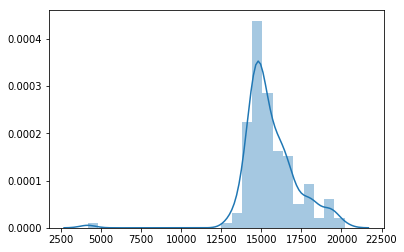

In [77]:
sns.distplot(len_map_table['sum'].tolist())